# Name: Bishoy Botros

### Project Name: T-20 World Cup 2022 Data Analysis
Welcome to the T-20 World Cup 2022 Data Science project. In this endeavor, we'll embark on an exciting
journey of comprehensive data analysis, drawing meaningful insights from the action-packed world of T-
20 cricket. We'll dive deep into the dataset, explore the nuances of the game, and provide valuable
insights and inferences.

**Problem Statement:**
The T-20 World Cup 2022 dataset provides a goldmine of cricket data, including detailed match
statistics, player performances, and game-changing events. Your mission is to unravel the stories hidden
within this dataset by:
1. Data Exploration: Delve into the dataset to uncover trends, patterns, and insights. Analyze the
performance of teams, players, and key events within the matches.
2. In-Depth Analysis: Examine player statistics, including runs, wickets, and over-by-over progress,
to understand the dynamics of the game.
3. Event Inference: Identify and analyze critical match events, such as boundaries, wickets, and
strategic moments. Uncover the factors that contribute to the success or downfall of a team.
4. Performance Evaluation: Evaluate individual and team performances, including standout
players, consistent run-scorers, and top wicket-takers. Discover what sets them apart.
5. Statistical Insights: Utilize statistical techniques to gain insights into team strategies, batting,
bowling, and match outcomes. Create visualizations that convey the story of the tournament.
Dataset Overview:
The dataset contains detailed information on T-20 World Cup 2022 matches. It includes:
- Match details: Match ID, names of the home and away teams, innings details, over-by-over progress.
- Player statistics: Runs, wickets, and other player-specific details.
- Match events: Boundaries, wickets, retired hurt scenarios, and more.
- Commentary text: Pre-match, in-match, and post-match commentary snippets.
Conclusion:
This project presents a thrilling opportunity to analyze real-world T-20 cricket data and draw meaningful
insights from it. By the end of this project, you'll have developed strong analytical skills, honed your data
analysis techniques, and have the ability to provide a comprehensive understanding of the T-20 World
Cup 2022.

# Import necessary libraries and Explore dataset information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
dataset_path = 'T-20 World cup 2022.csv'  
data = pd.read_csv(dataset_path)

# Explore dataset information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

### Display summary statistics

In [2]:

print(data.describe())



          comment_id      match_id   innings_id         over         ball  \
count    9814.000000  9.814000e+03  9814.000000  9814.000000  9814.000000   
mean    85399.661708  1.298157e+06     1.477787    10.082841     3.486856   
std     78951.670137  1.355630e+01     0.499532     5.623045     1.707484   
min       110.000000  1.298135e+06     1.000000     1.000000     1.000000   
25%     18030.000000  1.298145e+06     1.000000     5.000000     2.000000   
50%     29010.000000  1.298157e+06     1.000000    10.000000     3.000000   
75%    118040.000000  1.298169e+06     2.000000    15.000000     5.000000   
max    219090.000000  1.298179e+06     2.000000    20.000000     6.000000   

              runs   batsman1_id  batsman1_runs  batsman1_balls    bowler1_id  \
count  9814.000000  9.814000e+03    9814.000000     9814.000000  9.814000e+03   
mean      1.202262  5.377303e+05      15.691971       13.249440  6.226676e+05   
std       1.476730  3.181419e+05      16.454378       11.471307

### Analyze player statistics

**segment groups the cricket dataset by batsman names, aggregates key statistics (runs, balls faced, retired hurt instances) for each batsman, and presents the results in a structured DataFrame (player_stats). This analysis is crucial for understanding batting performance, player behavior, and injury occurrences during matches.**

In [3]:
player_stats = data.groupby(['batsman1_name']).agg({
    'batsman1_runs': 'sum',
    'batsman1_balls': 'sum',
    'isRetiredHurt': 'sum'
}).reset_index()

##### Visualize top run scorers

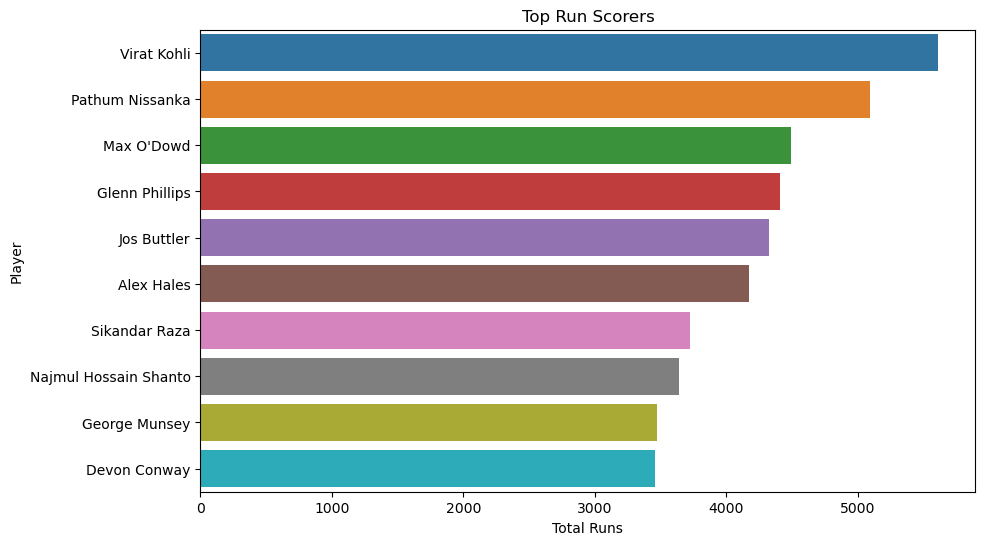

In [4]:
top_scorers = player_stats.sort_values(by='batsman1_runs', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='batsman1_runs', y='batsman1_name', data=top_scorers)
plt.title('Top Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()

**segment efficiently analyzes cricket match events by extracting relevant data columns, calculating event frequencies, categorizing wicket types, and presenting the results through a bar chart visualization. The visualization provides insights into the occurrence of key match events, such as boundaries, wides, and no-balls, which are essential for understanding match dynamics and player performance.**

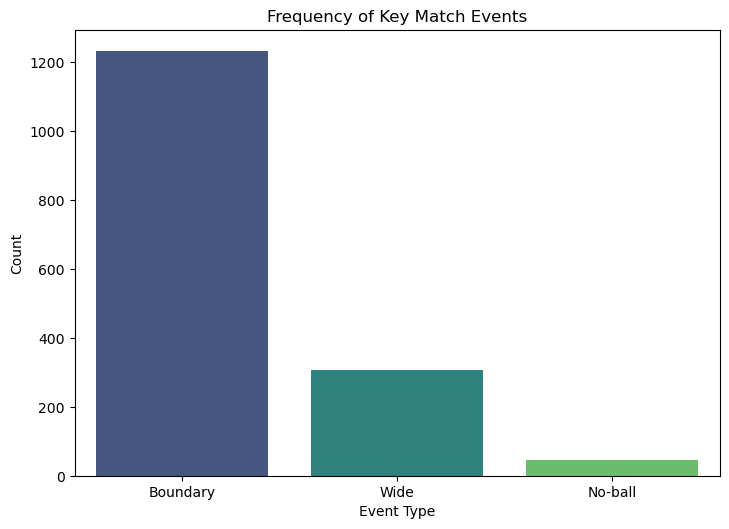

In [5]:
# Extract relevant columns for event analysis
event_data = data[['isBoundary', 'isWide', 'isNoball', 'wkt_text']]

# Count occurrences of each event type
boundary_counts = event_data['isBoundary'].sum()
wide_counts = event_data['isWide'].sum()
noball_counts = event_data['isNoball'].sum()

# Clean and categorize wicket types
wicket_counts = event_data['wkt_text'].value_counts()
valid_wickets = wicket_counts[~wicket_counts.index.str.contains('retired')]

# Plotting Event Distribution
plt.figure(figsize=(14, 10))

# Plotting bar chart for event counts
plt.subplot(2, 2, 1)
event_types = ['Boundary', 'Wide', 'No-ball']
event_counts = [boundary_counts, wide_counts, noball_counts]
sns.barplot(x=event_types, y=event_counts, palette='viridis')
plt.title('Frequency of Key Match Events')
plt.xlabel('Event Type')
plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlapping plots
plt.show()

**analyzes and visualizes the distribution of valid wicket types in cricket matches using a pie chart. The visualization helps in understanding the relative frequency of different types of wickets, excluding those categorized as 'retired'. To use this code, ensure that the required libraries (matplotlib, seaborn) are installed and that the data variable refers to the loaded cricket dataset.**

**By leveraging this analysis, cricket enthusiasts and analysts can gain insights into the nature of wickets taken during matches, which is valuable for assessing player performance and match dynamics.**

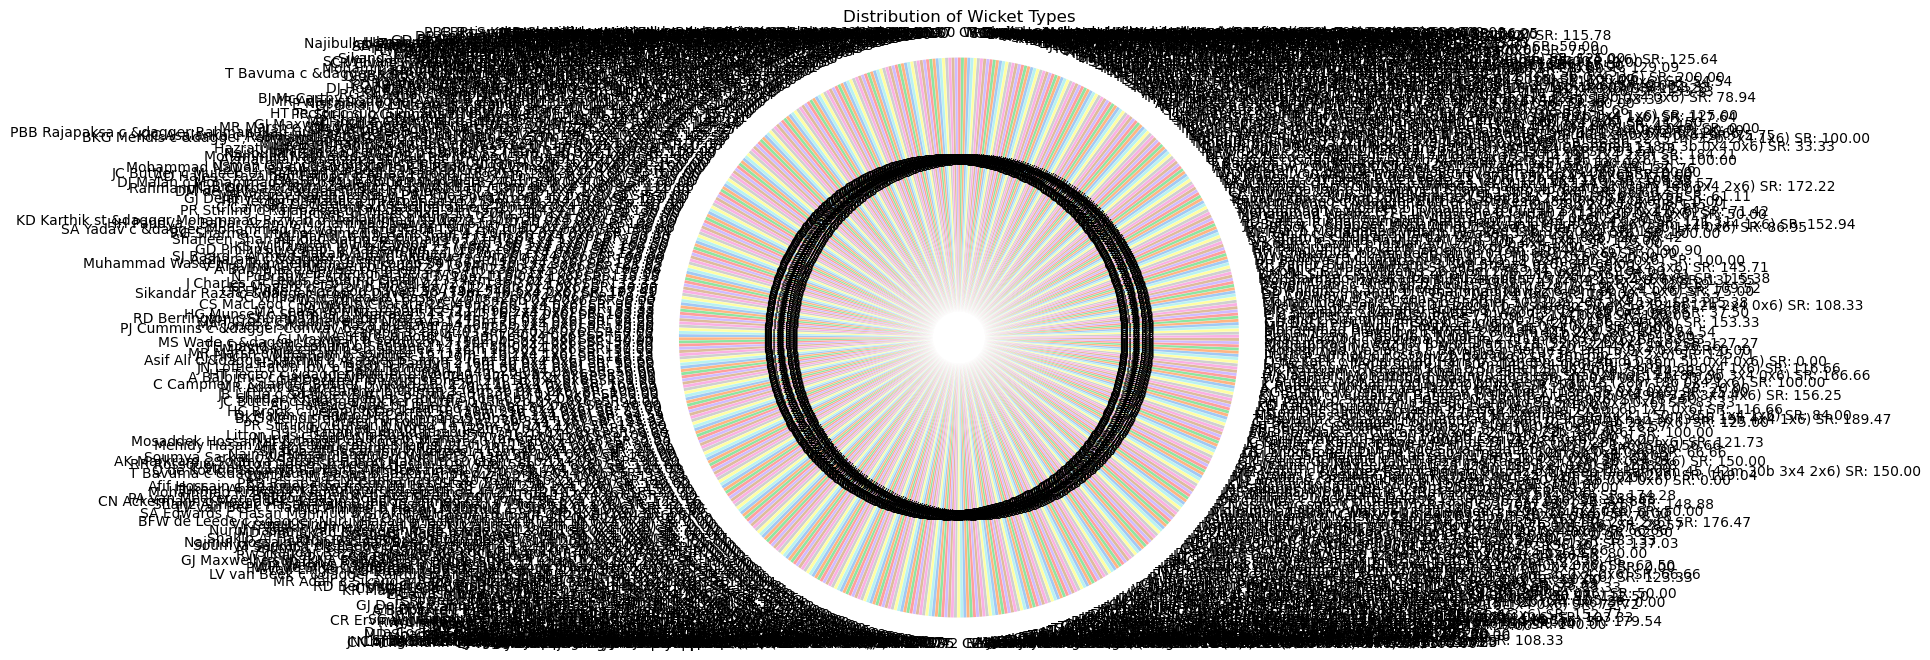

In [6]:
# Extract relevant columns for event analysis
event_data = data[['isBoundary', 'isWide', 'isNoball', 'wkt_text']]

# Clean and categorize wicket types
wicket_counts = event_data['wkt_text'].value_counts()
valid_wickets = wicket_counts[~wicket_counts.index.str.contains('retired')]

# Plotting Distribution of Wicket Types
plt.figure(figsize=(10, 8))

# Customize the pie chart colors
color_palette = sns.color_palette('pastel')
explode = [0.1 if count == valid_wickets.max() else 0 for count in valid_wickets]  # Highlight the most frequent wicket type

# Plotting pie chart for wicket types
plt.pie(valid_wickets, labels=valid_wickets.index, autopct='%1.1f%%', startangle=140, colors=color_palette, explode=explode)
plt.title('Distribution of Wicket Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**visualizes the distribution of runs scored in cricket matches using a histogram. The histogram provides insights into the frequency and range of runs scored, aiding in understanding the typical scoring patterns in the dataset.**

**The resulting histogram plot will assist cricket enthusiasts and analysts in analyzing the distribution of runs scored across matches, highlighting common scoring ranges and patterns within the dataset. Adjust the bin size (bins) for a different level of granularity in the histogram representation, as needed.**

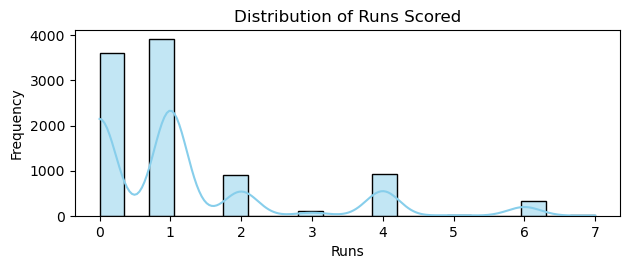

In [7]:
# Plotting histogram for runs scored
plt.subplot(2, 2,(3,4))
sns.histplot(data['runs'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping plots
plt.show()

## Plotting boxplot for runs scored by innings

**creates a boxplot to analyze the distribution of runs scored by innings in a cricket dataset. The boxplot is particularly useful for understanding the spread, central tendency, and potential outliers of runs scored during each innings (first or second).**

**The resulting boxplot will provide valuable insights into how runs are distributed across innings, aiding cricket analysts and enthusiasts in identifying trends and patterns related to scoring performance during different phases of the match. Adjust the color palette (palette) as desired to customize the visual appearance of the boxplot.**

Text(0, 0.5, 'Runs')

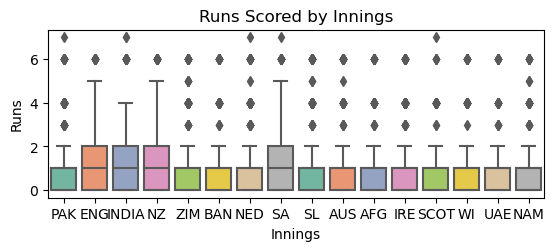

In [8]:
plt.subplot(2, 2, (3, 4))  # Span the last subplot across two positions (3 and 4)
sns.boxplot(x='current_innings', y='runs', data=data, palette='Set2')
plt.title('Runs Scored by Innings')
plt.xlabel('Innings')
plt.ylabel('Runs')

## Visualize match outcomes
**valuable for analyzing team performances and match outcomes based on cricket match data. It provides insights into key metrics such as total runs scored by each team and statistical indicators like maximum runs and wickets taken per match.**

**The resulting scatter plot (Match Outcomes) offers a graphical representation of how runs and wickets correlate in cricket matches, facilitating the interpretation of match performance and statistical trends. Adjust the figure size (figsize) as needed to optimize the visualization for presentation or analysis purposes.**

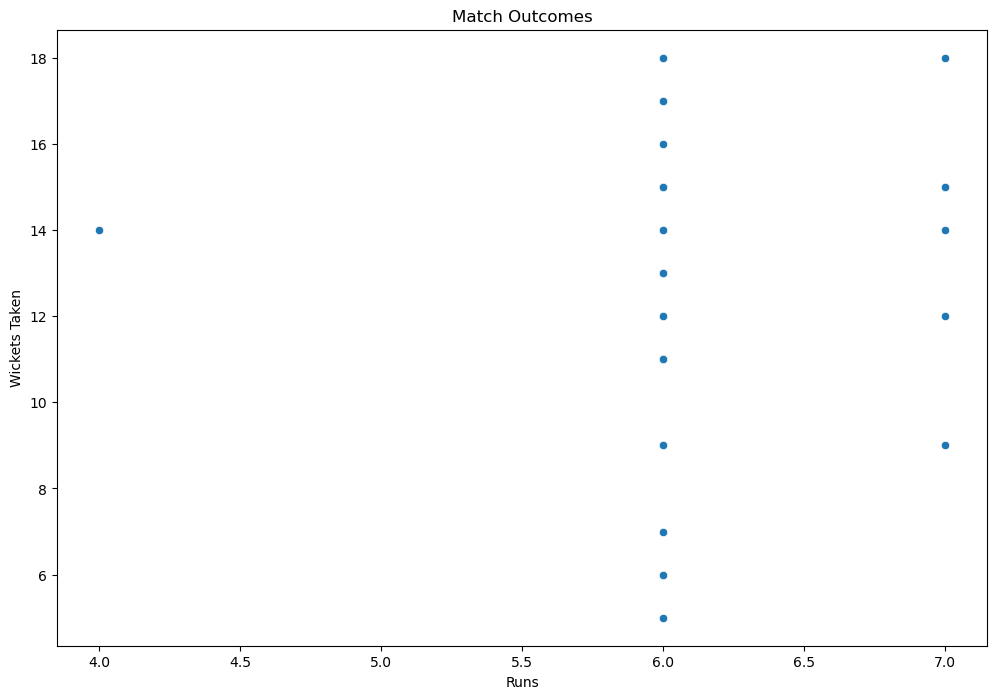

In [9]:
# Performance Evaluation
# Evaluate team performances
team_performance = data.groupby('home_team').agg({
    'runs': 'sum',
    'bowler1_wkts': 'sum'
}).reset_index()

# Statistical Insights
# Analyze match outcomes
match_outcomes = data.groupby('match_name').agg({
    'runs': 'max',
    'wkt_bowler_name': 'count'
}).reset_index()

# Visualize match outcomes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='runs', y='wkt_bowler_name', data=match_outcomes)
plt.title('Match Outcomes')
plt.xlabel('Runs')
plt.ylabel('Wickets Taken')
plt.show()

**utilizes Plotly Express (px) to create a box plot (fig) that visualizes the distribution of runs scored (y='runs') across different innings (x='innings_id') from a cricket dataset (data).**

**The resulting box plot (fig) visually represents the distribution of runs scored (y-axis) across different innings (x-axis). Each box in the plot represents the interquartile range (IQR) of runs scored in a specific inning, with the median (middle line) and outliers (points beyond whiskers) depicted. This visualization aids in understanding the variability and central tendency of runs scored across innings in cricket matches.**

In [11]:
fig = px.box(data, x='innings_id', y='runs', title='Runs Scored by Innings',
             labels={'innings_id': 'Innings', 'runs': 'Runs'})
fig.update_traces(marker_color='skyblue') 
fig.show()

**creates a pie chart to visualize the distribution of wicket types from a cricket dataset (data).**

**This pie chart visualization provides an insightful view of the relative frequencies of different wicket types in cricket matches, enhancing data interpretation and analysis.**

In [13]:
# Plotting pie chart for wicket types
wicket_counts = data['wkt_text'].value_counts()
labels = wicket_counts.index
values = wicket_counts.values

# Create a Pie chart figure
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(title='Distribution of Wicket Types',  # Set the title of the figure
                  height=600,  
                  width=1000, 
                  showlegend=True,  # Display the legend
                  legend=dict(x=0.8, y=0.5, bgcolor='rgba(255, 255, 255, 0.7)'),  
                  hoverlabel=dict(font_size=16, font_family='Arial'),  )

# Show the maximized pie chart figure
fig.show()